<a href="https://colab.research.google.com/github/jaekyoungkim/first_pytorch/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EC%B2%AB%EA%B1%B8%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.검증환경

In [ ]:
# 우분투 16.04 , 파이토치는 0.4부터 윈도우를 지원
# 4장~6장 : 무거운 처리를 실행하므로 cuda사용, nvidia gpu필요
# cuda : 엔비디아가 제공하는 gpu용의 과학 게산 플랫폼으로 전용 컴파일러나 라이브러리로 구성됨
# 본인 pc에 gpu탑재 불가능한경우, aws, azure, gcp등의 클라우드에서 gpu를 탑재한 인스턴스를 사용하는 방법도 있음


In [ ]:
!sudo apt-get install nvidia-418


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package nvidia-418


In [ ]:
!sudo reboot

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to talk to init daemon.


# 1.파이토치의 기본 

In [ ]:
# 파이토치의 패키지 구성
# 1. torch : 메인 네임스페이스, 텐서등의 다양한 수학함수가 포함됨
# 2. torch.autograd : 자동미분을 위한 함수가 포함, 자동미분의 on/off를 제어하는 콘텍스트 매니저나 미분가능 함수를 정의할때 사용하는 function등이 포함됨
# 3. torch.nn : 신경망을 구축하기 위한 다양한 데이터 구조나 레이어등의 정의됨 , conv, lstm, relu, mseloss등 
# 4. torch.optim : sgd를 중심으로한 파라미터 최적화 알고리즘이 구현됨
# 5. torch.utils.data : sgd의 반복 연산을 실행할때 사용하는 미니 배치용 유틸리티 함수가 포함됨
# 6. torch.onnx : onnx포맷으로 모델을 엑스포트 할때 사용, onnx는 서로 다른 딥러닝 프레임 워크 간에 모델을 공유할떄 사용됨


In [ ]:
# 텐서
# 다차원 배열을 처리하기 위한 데이터 구조
# numpy, array와 거의 같은 api를 지님
# 텐서는 각 데이터형별로 정의됨 
# 32비트의 유동소수점은 torch.FloatTensor
# 64비트의 부호있는 정수라면torch.LongTensor 
# gpu 상의 계산시 torch.cuda.FloattTensor


In [ ]:
# 텐서의 생성과 변환
# 다양한 방법으로 생성 가능
import numpy as np 
import torch 
t = torch.tensor([[1,2],[3,4.]]) ; t

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
t= torch.tensor([[1,2], [3,4.]], device = "cuda:0") ;t 

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [ ]:
# dtype를 사용해 데이터형을 지정하여 텐서를 만들 수 있음
t = torch.tensor([[1,2],[3,4.]], dtype= torch.float64) ;t 

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
t= torch.arange(0,10) ; t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
t= torch.zeros(100,10).to("cuda:0") ; t # t.shape

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
t= torch.randn(10, 10) ;t

tensor([[ 1.4497,  0.6736, -0.7324, -1.0485, -1.3153,  0.2551,  0.8601, -0.6705,
          0.8349,  0.0101],
        [ 1.6403, -0.2333,  1.1427, -1.0933,  1.8807,  0.8200,  0.4665, -1.0210,
         -1.1796, -1.3129],
        [ 0.0667,  1.9906,  1.1271,  0.1002, -1.7373,  0.0293, -2.0358, -0.5299,
          1.4335,  1.0897],
        [ 1.7552,  0.9433,  0.2683,  2.0104,  0.2509, -0.7828, -0.9818,  0.6293,
          2.1948, -0.3814],
        [ 0.5566, -0.9513,  1.9614,  0.8644,  1.2652, -1.1310,  0.2408, -0.4948,
         -1.7695, -0.8663],
        [ 0.7239, -1.0591,  2.0326, -0.3334,  0.9148,  0.7331, -0.1892, -0.0998,
         -2.2082,  0.7286],
        [-0.1878, -0.5154,  0.5148,  0.3801,  1.0625, -1.5046, -0.0590,  0.9657,
         -0.6269, -0.3832],
        [-0.3617,  0.7213, -0.1901,  0.5730,  0.8108, -0.9505, -1.3907, -0.4488,
         -1.9017, -0.0134],
        [-1.3951,  1.2199,  0.2149,  0.4532,  0.9360, -0.1669,  0.3504,  1.5673,
         -1.6062,  0.2857],
        [-0.8615, -

In [ ]:
t.size()

torch.Size([10, 10])

In [ ]:
t.shape() # tensor의 사이즈는size로 확인가능

TypeError: ignored

In [ ]:
# 텐서의변환
t= torch.tensor([[1,2], [3,4.]]) ;t 
x= t.numpy() ;x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [ ]:
# gpu상의 텐서는 to 메서드 사용
# cpu텐서로 이동할 필요가 있음
t= torch.tensor([[1,2],[3,4]], device= "cuda:0") 
x= t.to("cpu").numpy()  ; x

array([[1, 2],
       [3, 4]])

In [ ]:
# 텐서의 인덱스 조작
# 텐서는 ndarray와 마찬가지로 인덱스 조작을 지원함
# A[i,j]의 i,j첨자 인덱스
t= torch.tensor([[1,2,3], [4,5,6]]); t

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
t[0,2] 

tensor(3)

In [ ]:
t[:, :2]

tensor([[1, 2],
        [4, 5]])

In [ ]:
t[:, [1,2]]

tensor([[2, 3],
        [5, 6]])

In [ ]:
t[t>3]

tensor([4, 5, 6])

In [ ]:
t[0,1] = 100;t  # 0,1요소를 100으로 바꿈 

tensor([[  1, 100,   3],
        [  4,   5,   6]])

In [ ]:
t[:,1] =200; t

tensor([[  1, 200,   3],
        [  4, 200,   6]])

In [ ]:
t[t>10] = 20; t

tensor([[ 1, 20,  3],
        [ 4, 20,  6]])

In [ ]:
# mask 배열 [f,f,t]등의 각 요소가 t or f

In [ ]:
# 텐서 연산
# 텐서는 사칙 연산이나 수학함수, 선형대수 계산등이 가능함-> ndarray대신에 사용할 수 있음
# 행렬곱이나 특이값분해등의 선형대수 계산은 gpu를 사용할 수 있음
# 대규모 데이터를 처리할떄는 numpy scipy보다 훨씬 빠름
# 사칙연산은 텐서간이나 텐서와 파이썬의 스칼라값에만 가능함
# 텐서와 ndarray간 연산은 지원하지 않음
# 텐서간에도 동일한 형이어야 함
# floattensor와 doubletensor연산시에는 오류가 발생
# 사칙연산은ndarray처럼 브로드캐스트가 적용돼서 두개의 서로 다른 차원의 벡터와 스칼라 또는 행렬과 벡터 간의 연산시 결괏값의 차원은 두 차원 중 큰차원을 따르는 차원보간이 이뤄짐


In [ ]:
v= torch.tensor([1,2,3])
w= torch.tensor([0,10,20]) 
m= torch.tensor([[0,1,2], [100,200,300]]) 

In [ ]:
v2= v+10; v2

tensor([11, 12, 13])

In [ ]:
v2 = v**2;v2

tensor([1, 4, 9])

In [ ]:
z= v-w;z


tensor([  1,  -8, -17])

In [ ]:
u = 2*v-w /10 + 6; u

tensor([ 8.,  9., 10.])

In [ ]:
m2 = m * 2.0;m2


tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])

In [ ]:
m3 = m+v; m3 #브로드캐스트가 적용됨

tensor([[  1,   3,   5],
        [101, 202, 303]])

In [ ]:
m4 = m + m; m4

tensor([[  0,   2,   4],
        [200, 400, 600]])

In [ ]:
# 수학함수
X = torch.randn(100,10) 
y= X*2+ torch.abs(X) ;y

tensor([[ 5.9221e-01, -1.2603e+00,  6.7976e+00, -1.3200e+00, -7.4547e-01,
          5.2396e+00, -8.2165e-01, -1.1094e+00,  8.1720e+00,  8.6783e-01],
        [-1.4690e+00, -8.8312e-01,  3.1006e+00,  1.5288e+00,  1.3724e+00,
          3.2097e+00,  3.7131e+00,  2.2249e+00,  1.6374e+00,  1.3883e+00],
        [ 2.2505e+00, -8.9221e-01,  2.6224e+00,  9.5893e-01, -1.1626e+00,
         -4.1802e-02,  4.6794e+00, -7.1971e-01, -8.8695e-01,  2.3247e+00],
        [ 4.0958e+00, -5.5391e-01, -1.1528e+00, -4.1156e-01, -8.8949e-01,
         -4.4894e-01,  5.9509e-01,  1.6687e+00,  9.6610e-01, -6.6284e-01],
        [-3.0419e+00, -2.8883e-01, -1.1320e+00,  1.2187e+00,  2.5119e+00,
          4.0545e+00,  3.6259e-01, -5.3140e-01, -2.2119e+00, -4.5708e-02],
        [-6.1885e-01,  7.3800e+00, -1.3499e+00,  5.0148e+00,  1.6502e+00,
          2.7433e+00, -4.6232e-01,  1.3886e+00, -1.7076e-01,  1.5590e+00],
        [-4.2166e-01,  1.9242e+00,  6.3140e-01, -1.3374e+00, -1.2501e+00,
          2.6483e+00,  8.1376e-0

In [ ]:
# 평균치 구하기 
m = torch.mean(X) ; m

tensor(0.0239)

In [ ]:
m = X.mean(); m # 함수가 아닌  메서드 형태로 실행가능

tensor(0.0239)

In [ ]:
# 집계결과는 0차원 텐서로 item메서드를 사용해서 값 추출 가능

In [ ]:
x1 = torch.tensor([[1,2], [3,4.]])  # 2x2
x2 = torch.tensor([[10,20,30], [40,50,60]]) # 2x3
x2

tensor([[10, 20, 30],
        [40, 50, 60]])

In [ ]:
# 2x2 를  4x1로 보여준다
x1.view(4,1) 

tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [ ]:
x2.t()

tensor([[10, 40],
        [20, 50],
        [30, 60]])

In [ ]:
# dim=1 로 결합하면 2x5의 텐서를 만들수있음
torch.cat([x1,x2], dim=1) # 2x5

# 2x2 concat 2x3 
# 두번째 차원으로 합치기 2x(2+3) 

tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])

In [ ]:
torch.cat([x1,x2], dim=0)

RuntimeError: ignored

In [ ]:
# HWC를 CHW로 변환
hwc_img_data = torch.rand(100,64,32,3) 
chw_img_data = hwc_img_data.transpose(1,2).transpose(1,3) ; chw_img_data.size()
# (100,64,32,3)  - > [100,32,64,3] -> [100,32,64,3]

torch.Size([100, 3, 64, 32])

In [ ]:
# 선형대수의 연산자
# dot : 벡터내적
# mv : 행렬과 벡터의 곱
# mm : 행렬과 행렬의 곱
# matmul : 인수의 종류에 따라 자동으로 dot, mv, mm을 선택해서 실행
# gesv : LU분해를 사용한 연릭방정식의 해
# eig.symeig : 고유값 분해, symeig는 대칭 행렬보다 효율이 좋은 알고리즘
# svd : 특이값 분해


In [ ]:

m = torch.randn(100,10) 
v = torch.randn(10) 
d = torch.dot(v,v) ;d #벡터 내적

tensor(13.9528)

In [ ]:
v2 = torch.mv(m,v) ; v2 # 100차원 행렬과 벡터의 곱

tensor([ 0.7196, -5.6262, -2.7636,  2.5451, -1.4247,  2.6885, -0.1412, -4.4001,
        -0.2208,  0.9396, -5.1157,  1.1583,  1.5345, -0.5466, -0.1194,  5.1450,
        -7.2692, -1.2521,  4.6835,  0.6710, -6.1006, -4.7107, -3.4808, -6.9523,
         2.2625,  0.0338,  2.8336, -3.9873,  3.0829, -2.9793, -1.5277, -1.5002,
        -1.3905, -0.2505, -2.3691,  2.7653, -2.7163,  4.1164,  0.1837, -4.0685,
        -0.8255, -5.5428,  2.6199, -4.6069,  5.6038, -2.3431,  0.4932,  0.6682,
         6.3418, -2.6432, -4.3154, -5.3974, -7.1547,  0.7274, -0.1376, -1.9873,
         2.4482, -9.9913, -6.8943,  1.3872,  2.0703, -0.3023,  1.3168,  2.7784,
         0.6082, -1.4031, -0.8793,  3.1850, -2.5085, -0.1537,  3.8219,  0.0511,
         1.7745, -0.3348,  0.3608,  3.3026, -6.4903,  0.8190,  4.8867,  3.3216,
        -4.5565,  0.4270,  4.5038,  2.9676,  4.6522, 10.6578,  1.7539, -4.2254,
        -2.0053,  0.9829,  1.3450,  3.2908,  1.8015,  0.7654,  0.1382,  5.1534,
         5.8138,  2.5127, -1.3300,  0.82

In [ ]:
m2 = torch.mm(m.t(), m) ;m2 # 10x10

tensor([[118.4707,   4.1114,   6.9955,  35.7579,  13.4251,   6.8365,  -3.6286,
         -11.7381, -14.6536,  25.5066],
        [  4.1114,  84.3602,  -2.7952,  -9.0201,  15.5138,   7.0633, -13.5769,
           5.0436,  -0.3266,   8.5041],
        [  6.9955,  -2.7952,  93.2776, -10.0067,  21.9992,   5.2277,  11.8536,
          -2.2523, -12.4800,  -7.2879],
        [ 35.7579,  -9.0201, -10.0067, 126.0756,  -0.8590, -13.7646,  12.8496,
          -9.4292,  -1.2362,   2.1052],
        [ 13.4251,  15.5138,  21.9992,  -0.8590,  85.0130,  -1.7628,  -6.1835,
           3.1972,  -7.0912,  10.8148],
        [  6.8365,   7.0633,   5.2277, -13.7646,  -1.7628,  87.7354,  -7.4755,
          -5.0118,  14.7625,   9.2338],
        [ -3.6286, -13.5769,  11.8536,  12.8496,  -6.1835,  -7.4755,  96.7050,
         -15.3422,  16.4220,  -6.2517],
        [-11.7381,   5.0436,  -2.2523,  -9.4292,   3.1972,  -5.0118, -15.3422,
          94.2373,  -8.7790,   6.6869],
        [-14.6536,  -0.3266, -12.4800,  -1.2362,

In [ ]:
u,s,v = torch.svd(m) 

In [ ]:
u

In [ ]:
s

tensor([13.1270, 12.3738, 11.3888, 10.8720,  9.6368,  9.4977,  8.8983,  8.2431,
         8.0310,  7.2082])

In [ ]:
v

tensor([[-0.6709,  0.0154, -0.2024,  0.1273, -0.1848,  0.1235, -0.1763, -0.2076,
         -0.6019, -0.0811],
        [-0.0338, -0.2644, -0.2664, -0.0045,  0.2567,  0.3816,  0.4601,  0.5542,
         -0.2423,  0.2625],
        [-0.0573, -0.1437,  0.1717,  0.7059,  0.1439, -0.0372, -0.3018,  0.0047,
          0.1102,  0.5683],
        [-0.5435,  0.4917,  0.1489, -0.2505,  0.2798,  0.1925, -0.1411,  0.2472,
          0.4085,  0.1213],
        [-0.1837, -0.2513, -0.0775,  0.3558,  0.4889,  0.1500,  0.1911, -0.2584,
          0.2899, -0.5672],
        [ 0.0455, -0.0815, -0.4523,  0.1893, -0.3867,  0.1426, -0.4358,  0.4623,
          0.2960, -0.2998],
        [ 0.0262,  0.4405,  0.1169,  0.3670,  0.1243, -0.5006,  0.1675,  0.4394,
         -0.2805, -0.3018],
        [ 0.0868, -0.3209,  0.0541, -0.3193,  0.5349, -0.1934, -0.5879,  0.1789,
         -0.2704, -0.1014],
        [ 0.3219,  0.4969, -0.6302,  0.0589,  0.3326,  0.0997, -0.1158, -0.2864,
         -0.0917,  0.1562],
        [-0.3201, -

In [ ]:
# 텐서의 자동미분
# 텐서에는 requires_grad라는 속성이 있어서  이것을 true로 설정하면서 자동미분기능이 활성화됨
# requires_grad가 적용된 텐서에 다양한 계산을 하게되면 계산 그래프가 만들어지며, backward메서드를 호출하면 그래프로부터 자동으로 미분을 계산함
x = torch.randn(100,3) 
a= torch.tensor( [1,2,3.], requires_grad = True) ;  a


tensor([1., 2., 3.], requires_grad=True)

In [ ]:
y= torch.mv(x,a)
o = y.sum() ; o

tensor(-63.9546, grad_fn=<SumBackward0>)

In [ ]:
y

tensor([ -1.6790,   6.2234,   2.0262,   0.1843,  -3.7172,   2.0680,  -0.8868,
         -7.7327,  -7.7681,  -4.3122,   3.9296,   2.7129,  -0.8416,   0.6948,
         -7.1300,  -5.2981,   1.0602,  -5.0065,  -2.2662,  -1.4891,  -9.8259,
          3.2916,  -7.5531,  -0.5393,   3.7111,   1.7188,   1.7728,  -2.5365,
          1.8044,  -1.3422,   3.9039,  -2.3873,   2.7519,   3.8940,  -0.1235,
          0.3915,   3.9567,  -6.9399,  -1.2097,  -0.5016,  -4.2354,   1.1949,
          4.6657,   2.2072,  -2.4985,  -3.5056,  -5.3671,   4.0049,  -0.7339,
         -0.5657,  -5.3371,  -3.7756,   1.4645,   1.4231,   0.0615,   0.0887,
          0.5977,   4.4149,  -3.1129,  -1.4848,  -2.9377,   3.5605,   2.5547,
          3.7236,  -2.2764,  -0.2551,   1.0378,  -3.3118,  -3.7667,   3.3440,
          5.5823,  -7.4519,  -6.8586,   5.3651,   0.2065,   2.0097,   0.3408,
          7.1689,  -3.7455,   2.6760,   3.0943,   1.8630,  -0.4149,  -6.1737,
         -4.2698,   4.3726,  -1.0226,   1.3489,  -1.9999,  -3.39

In [ ]:
o.backward() # 미분을 실행

In [ ]:
a.grad

tensor([-9.8775, 13.6320, -4.8564])

In [ ]:
x.sum(0)

tensor([-9.8775, 13.6320, -4.8564])

In [ ]:
x.sum()

tensor(-29.2973)

In [ ]:
a.grad != x.sum(0)

tensor([False,  True,  True])

In [ ]:
# 텐서는 자동으로 미분을 계산할 수 있어서 신경망 최적화에 중요한 역할을 함

# 2.최대우도와 선형모델 

In [ ]:
# mle : 최대우도 추정치, 우도를 최대로 만드는 파라미터 theta
# 계산이 쉽다는 이유로  대수우도(log likelihood)형태를 취함
#

In [ ]:
# 확률적 경사하강법
# 대수우도함수의 미분이 0이되는 방정식에 해석해가 없는경우에는 수치적으로 최적화해야함
# 목적함수를 최소화하는 것을 목표로함
# 최소화하는 경우의 목적함수를 손실함수라 함
# 대수우도 함수를 최대화 하는 것이 아니라 부호를 반대로 한것을 최소화 하는 것이 목표가됨
# 미분가능한 함수의 수치 최적화를 구하는 가장 간단한 방법이 경사하강법
# 미분계수를 이용해서 반복적으로 최적해 나가는 방법임
# 학습률이 크면 손실함수의 감소속도가 빠르지만 잘 수렴하지 않으면 진동이 발생할 가능성 생김
# 학습률이 적으면 손실함수의 감소가 느리며, 수렴할때까지 많은 계산을 해야함
# 랜덤으로 일부값(미니배치)만 사용하는 sgd(확률적 경사 하강법)을 이용 가능함
# 데이터 규모가 큰경우에 적합함



In [ ]:
# y = 1+ 2x1 + 3x2 의 파라미터를 구해보기


In [ ]:
import torch
w_true = torch.Tensor([1,2,3]) # 위식의 기울기와 절편
X = torch.cat([torch.ones(100,1), torch.randn(100,2)] , dim= 1);X 

tensor([[ 1.0000e+00,  3.0264e-01,  1.6885e+00],
        [ 1.0000e+00,  3.0138e+00, -3.5700e-01],
        [ 1.0000e+00, -4.5663e-01,  1.4095e+00],
        [ 1.0000e+00, -1.5481e+00,  1.8883e+00],
        [ 1.0000e+00, -3.0072e-02,  8.7388e-01],
        [ 1.0000e+00, -1.6394e+00,  1.3134e+00],
        [ 1.0000e+00, -2.4008e-03,  6.2055e-02],
        [ 1.0000e+00,  5.1827e-02,  2.5118e-01],
        [ 1.0000e+00,  1.3734e+00,  7.5427e-01],
        [ 1.0000e+00,  4.5136e-01, -9.0120e-01],
        [ 1.0000e+00, -4.8555e-03, -1.0073e+00],
        [ 1.0000e+00,  2.3494e-02, -1.1585e+00],
        [ 1.0000e+00, -7.7548e-01,  9.8981e-01],
        [ 1.0000e+00, -2.7553e-01,  3.6380e-01],
        [ 1.0000e+00, -4.1333e-01, -5.6058e-01],
        [ 1.0000e+00,  2.9504e-01,  1.5440e+00],
        [ 1.0000e+00,  3.0474e-01, -1.4992e+00],
        [ 1.0000e+00, -3.9966e-02,  9.4493e-01],
        [ 1.0000e+00, -1.7312e+00,  8.0155e-01],
        [ 1.0000e+00, -3.1031e-02, -1.1673e-01],
        [ 1.0000e+00

In [ ]:
y = torch.mv(X, w_true) + torch.randn(100) * 0.5 ;y

tensor([ 7.0387,  4.7634,  4.3648,  2.5690,  3.6141,  2.3951,  1.1191,  1.0221,
         5.8928, -1.3757, -1.6036, -2.3283,  3.7007,  1.8242, -1.2647,  6.0826,
        -2.9351,  4.1109,  0.1206,  1.6292,  3.2002,  1.2211, -3.3550, -5.1352,
         1.0322, -7.5687, -1.3146,  0.0505,  0.4828,  0.6365,  1.7273, -6.6473,
         2.2028,  4.1371,  5.4199,  0.7645,  5.4809,  6.8487,  0.6611, -1.6329,
        -4.9646, -0.9458,  0.1057,  6.0386, -6.4018, -1.0593, -1.8065, -0.5978,
         0.0853,  3.1510,  0.8854, -3.7973,  5.0156, -9.6042,  3.7093, -2.4936,
        -1.8619,  5.0426,  3.4686,  2.0843,  8.3638,  2.6321,  2.1275,  0.0461,
        -6.2224, -4.1168,  3.3733,  1.1363, -1.5954, -5.6294,  3.9052, -0.3891,
         0.1640,  1.2006, -3.9596, -4.5119,  5.1655, -3.5877,  2.0833,  5.8799,
        -2.3284,  1.2376,  2.7952,  2.7142,  2.4482, -0.6767,  3.7698,  0.7685,
        -1.4449,  0.2540,  5.6239, -0.0124,  0.0856,  4.1160,  1.2447,  1.8554,
        -0.3709,  4.2999, -2.3005, 11.40

In [ ]:
# 기울기 하강으로 최적화하기위해 파라미터 tensor를 난수로 초기화해서 생성
w= torch.randn(3, requires_grad =True) ;w 

tensor([-0.8532,  0.0689, -1.2022], requires_grad=True)

In [ ]:
w.data

tensor([-0.8532,  0.0689, -1.2022])

In [ ]:
gamma = 0.1 

In [ ]:
 # 경사하강법으로 파라미터 최적화
# 손실함수의 로그
losses = []

for epoch in range(100) : 
  w.grad = None # 전회의 backward메서드로 계산된 경사값을 초기화
  y_pred = torch.mv(X, w)  # w에 대한 backward가 진행될 예정임
  loss = torch.mean((y-y_pred)**2)  # loss값이 최종값
  loss.backward()  # mse loss와 w에 의한 미분을 계산 

  # 경사를 갱신
  w.data = w.data - gamma * w.grad.data 
  losses.append(loss.item())

In [ ]:
losses

[25.37399673461914,
 16.262487411499023,
 10.468910217285156,
 6.778658866882324,
 4.4243927001953125,
 2.9202470779418945,
 1.9579471349716187,
 1.3415312767028809,
 0.9462174773216248,
 0.6924230456352234,
 0.5293183326721191,
 0.4243957996368408,
 0.35683852434158325,
 0.3133019506931305,
 0.28522148728370667,
 0.2670951783657074,
 0.25538501143455505,
 0.2478141039609909,
 0.24291545152664185,
 0.23974356055259705,
 0.23768813908100128,
 0.2363552302122116,
 0.23549027740955353,
 0.23492853343486786,
 0.23456346988677979,
 0.23432601988315582,
 0.23417140543460846,
 0.2340707778930664,
 0.2340051531791687,
 0.23396232724189758,
 0.23393438756465912,
 0.23391613364219666,
 0.2339041829109192,
 0.233896404504776,
 0.2338912934064865,
 0.2338879257440567,
 0.2338857203722,
 0.2338842898607254,
 0.2338833212852478,
 0.23388271033763885,
 0.23388227820396423,
 0.23388203978538513,
 0.2338818907737732,
 0.23388174176216125,
 0.23388166725635529,
 0.2338816076517105,
 0.23388156294822693,

In [ ]:
w.grad 

tensor([-1.1921e-07, -2.8997e-07, -1.8462e-07])

In [ ]:
y_pred = torch.mv(X,w) ;y_pred

tensor([-0.0085, -0.0246,  1.1179,  1.0199,  0.5109,  0.0774, -0.4930,  1.6154,
         0.7743, -0.8198,  0.9079, -0.1560,  0.5918, -0.7909, -0.0102,  0.3425,
        -0.1615, -0.3225,  0.5031, -0.5669,  1.2314,  1.3078,  1.0038, -0.8805,
         0.0408,  1.0552,  0.6817, -1.4399,  0.3638,  0.0505, -0.1903, -0.5112,
         0.3961,  0.5551,  0.2398,  0.3563,  0.0303,  0.1338, -0.0182, -0.4791,
         0.3137,  1.0918,  0.9052,  1.3500,  0.1977,  0.7091,  0.5913,  0.2823,
         0.5739, -0.0811,  0.8663,  0.2972,  0.0144,  0.5480, -0.6056, -0.1406,
        -0.3156,  0.9369,  0.4297,  0.5141,  0.4598,  0.3059, -0.1213, -0.4197,
         0.5934,  0.2481,  0.6694,  0.3124,  0.2208, -0.0794, -0.1778, -0.1519,
         0.1830,  0.5452,  0.7308,  0.4318,  1.2688,  0.5388,  1.0301,  0.9696,
         0.6760,  0.8281,  0.9249,  0.3368,  0.4737,  0.8321,  2.1106,  2.0753,
         0.7072,  0.1981,  0.1949, -0.4387,  1.6918, -0.8633,  0.1670, -0.2787,
        -0.3919,  0.0262, -1.0644,  0.53

In [ ]:
(y-y_pred)**2

tensor([4.6079e+00, 7.6586e+00, 7.1294e+00, 6.4358e-04, 3.9447e+00, 1.6313e-01,
        5.0902e+00, 1.2968e+01, 7.3846e+00, 5.6073e+00, 5.2727e+00, 1.0720e+01,
        1.3198e+01, 4.0561e-01, 7.4955e-02, 8.4345e-01, 4.3804e+00, 1.3176e+01,
        9.0718e-01, 2.9719e+01, 9.8230e+00, 1.4751e+01, 5.6378e+00, 1.2422e-01,
        1.2093e+01, 1.7371e+01, 7.0064e-01, 7.1437e+00, 2.1628e-01, 5.5870e+00,
        2.2913e-01, 1.3239e-02, 3.7579e-01, 3.4225e+00, 9.2970e-03, 6.9426e+00,
        7.8194e+00, 1.1184e+00, 2.7658e+01, 1.0102e+01, 4.7930e+00, 5.5973e+00,
        6.9926e+00, 5.0427e-02, 5.2780e+00, 8.6067e+00, 2.2299e-03, 2.7483e+01,
        4.4836e-01, 1.2498e+00, 1.0313e+01, 3.2075e+01, 1.1705e+01, 3.4437e+01,
        6.6149e-01, 3.2013e+01, 7.0291e-01, 4.2675e-01, 1.4334e+00, 8.1247e-01,
        2.3702e+01, 1.3259e+01, 7.4191e+00, 5.1107e-01, 1.6317e+01, 8.5295e+00,
        1.1126e+01, 5.4669e+01, 1.6920e+01, 4.7858e-01, 5.9750e+00, 1.6049e+00,
        4.7558e-02, 3.5804e+00, 1.2385e-

In [ ]:
torch.mean((y-y_pred)**2) 

tensor(8.4934, grad_fn=<MeanBackward0>)

In [ ]:
loss = torch.mean((y-y_pred)**2) 
loss.backward() 

In [ ]:
loss.item()

8.493419647216797

In [ ]:
loss

tensor(8.4934, grad_fn=<MeanBackward0>)

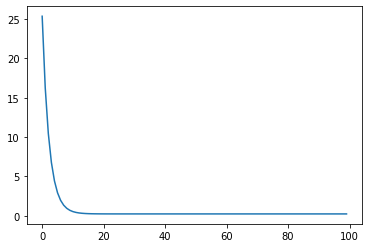

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt 
plt.plot(losses)

In [ ]:
w

tensor([0.9624, 1.9220, 3.0801], requires_grad=True)

In [ ]:
# 파이토치로 선형회귀 모델 만들기
# 이전에는 자동미분을 할때 이외에는 모델 구축이나 경사 하강법 계산을 모두 직접함
# 신경망을 풀때 공통적으로 사용되는 계산이므로, 파이토치에는 이 계산들을 쉽게 작성할 수 있게 해주는 모듈이 포함됨


In [ ]:
from torch import nn, optim 
# Linear 층을 작성, 절편은 회귀계수에 포함
# 입력차원을 3으로 하고, bias를 false로 함
net = nn.Linear(in_features = 3, out_features = 1, bias= False)  # 선형결합 계산하는 클래스 회귀계수나 절편등의 파라미터를 포함
# nn.Module의 서브클래스로 sgd등의 최적화기와 연계하거나 학습결과 파라미터를 저장하는 등 다양한 처리 가능

optimizer = optim.SGD(net.parameters(), lr = 0.1) 
loss_fn = nn.MSELoss() 
# 모델의 구축 : torch.nn
# 최적화 : torch.optim


In [ ]:
losses = [] 
for epoc in range(100): 
  optimizer.zero_grad() #  전회의 backward메서드로 계산된 경사값을 초기화
  y_pred = net(X) 
  loss = loss_fn(y_pred.view_as(y) , y) 
  # y_pred는 (n,1)같은 shape를 지니고있으므려 (n,) 형태로 변경할 필요가 있음
  loss.backward() 
  optimizer.step() # 경사를 갱신한다.
  losses.append(loss.item()) # 수렴확인을 위한 loss를 기록

In [ ]:
losses

[19.62334442138672,
 12.72098159790039,
 8.279315948486328,
 5.419905185699463,
 3.578310251235962,
 2.391711473464966,
 1.6268008947372437,
 1.1334912776947021,
 0.8151913285255432,
 0.609712541103363,
 0.4769984185695648,
 0.3912368714809418,
 0.33578699827194214,
 0.2999158799648285,
 0.2766972780227661,
 0.26165971159935,
 0.25191497802734375,
 0.2455962747335434,
 0.2414965033531189,
 0.23883487284183502,
 0.23710571229457855,
 0.23598161339759827,
 0.23525038361549377,
 0.2347744107246399,
 0.23446431756019592,
 0.23426219820976257,
 0.2341303825378418,
 0.23404432833194733,
 0.23398809134960175,
 0.23395134508609772,
 0.23392732441425323,
 0.23391152918338776,
 0.2339012175798416,
 0.2338944673538208,
 0.23389004170894623,
 0.23388710618019104,
 0.23388519883155823,
 0.23388393223285675,
 0.2338830977678299,
 0.2338826060295105,
 0.23388221859931946,
 0.23388199508190155,
 0.23388183116912842,
 0.23388169705867767,
 0.2338816523551941,
 0.23388159275054932,
 0.23388159275054932,

In [ ]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9624, 1.9220, 3.0801]], requires_grad=True)]

In [ ]:
# 로지스틱 회귀
# 로지스틱 회귀의 최대 우도 추정
# 파이토치를 사용한 로지스틱 회귀분석
import torch
from torch import nn, optim
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data[:100] 
y = iris.target[:100] 

In [ ]:
X= torch.tensor(X,  dtype = torch.float32) ;X

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [ ]:
y= torch.tensor(y, dtype = torch.float32) ; y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
net= nn.Linear(4,1) # iris데이터는 4차원
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = optim.SGD(net.parameters(), lr =0.25) 

In [ ]:
losses = []
for epoch in range(100): 
  optimizer.zero_grad() 
  y_pred = net(X) 
  loss = loss_fn(y_pred.view_as(y), y) 
  loss.backward() 
  optimizer.step() #경사를 갱신함
  losses.append(loss.item())

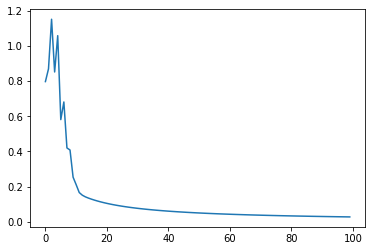

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt 
 plt.plot(losses)

In [ ]:
# 모델 작성
h= net(X)
prob = nn.functional.sigmoid(h) 
prob

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.0175],
        [0.0361],
        [0.0254],
        [0.0462],
        [0.0163],
        [0.0219],
        [0.0292],
        [0.0259],
        [0.0530],
        [0.0350],
        [0.0144],
        [0.0356],
        [0.0338],
        [0.0234],
        [0.0041],
        [0.0065],
        [0.0093],
        [0.0198],
        [0.0187],
        [0.0168],
        [0.0319],
        [0.0216],
        [0.0086],
        [0.0603],
        [0.0662],
        [0.0521],
        [0.0406],
        [0.0205],
        [0.0188],
        [0.0478],
        [0.0512],
        [0.0266],
        [0.0086],
        [0.0058],
        [0.0395],
        [0.0175],
        [0.0114],
        [0.0152],
        [0.0382],
        [0.0245],
        [0.0168],
        [0.0937],
        [0.0299],
        [0.0457],
        [0.0444],
        [0.0429],
        [0.0185],
        [0.0332],
        [0.0152],
        [0.0237],
        [0.9820],
        [0.9823],
        [0.9913],
        [0.9868],
        [0.9909],
        [0

In [ ]:
h

tensor([[-4.0279],
        [-3.2833],
        [-3.6456],
        [-3.0277],
        [-4.1000],
        [-3.7975],
        [-3.5024],
        [-3.6280],
        [-2.8821],
        [-3.3165],
        [-4.2283],
        [-3.3002],
        [-3.3528],
        [-3.7327],
        [-5.4828],
        [-5.0330],
        [-4.6698],
        [-3.9036],
        [-3.9594],
        [-4.0664],
        [-3.4113],
        [-3.8152],
        [-4.7528],
        [-2.7469],
        [-2.6461],
        [-2.9020],
        [-3.1613],
        [-3.8646],
        [-3.9557],
        [-2.9914],
        [-2.9193],
        [-3.5988],
        [-4.7508],
        [-5.1360],
        [-3.1922],
        [-4.0282],
        [-4.4653],
        [-4.1694],
        [-3.2271],
        [-3.6828],
        [-4.0668],
        [-2.2689],
        [-3.4811],
        [-3.0397],
        [-3.0699],
        [-3.1042],
        [-3.9727],
        [-3.3727],
        [-4.1734],
        [-3.7191],
        [ 3.9984],
        [ 4.0156],
        [ 4.

In [ ]:
y_pred = prob>0.5; y_pred

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True

In [ ]:
(y.byte() == y_pred.view_as(y)).sum().item() #100개의 샘플데이터가 정상적으로 이루어짐

100

In [ ]:
# 다중분류를 위한 로지스틱 회귀분석
import torch 
from torch import nn, optim 
from sklearn.datasets  import load_digits 
digits = load_digits() 

In [ ]:
X= digits.data ;X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
y=digits.target;y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
y.shape

(1797,)

In [ ]:
X=torch.tensor(X, dtype = torch.float32) 
y=torch.tensor(y, dtype = torch.int64)
# crossentropy 는 y를 int64로 받음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
(X.size()[1])

64

In [ ]:
net = nn.Linear(X.size()[1], 10) 

In [ ]:
loss_fn = nn.CrossEntropyLoss() 

In [ ]:
optimizer = optim.SGD(net.parameters(), lr = 0.01) 

In [ ]:
losses= [] 
for epoc in range(100): 
  optimizer.zero_grad() 
  y_pred = net(X) 
  loss = loss_fn(y_pred, y) 
  loss.backward() 
  optimizer.step()

  losses.append(loss.item()) 


In [ ]:
losses

[5.5032758712768555,
 4.410614013671875,
 2.943326711654663,
 2.3195183277130127,
 1.9333683252334595,
 1.6767441034317017,
 1.483318567276001,
 1.3245848417282104,
 1.1969913244247437,
 1.0899062156677246,
 1.0013080835342407,
 0.9259556531906128,
 0.8621560335159302,
 0.8073126077651978,
 0.7599852681159973,
 0.7187368869781494,
 0.6825212240219116,
 0.6504731178283691,
 0.6219143867492676,
 0.5963071584701538,
 0.5732167959213257,
 0.5522924661636353,
 0.5332424640655518,
 0.5158257484436035,
 0.4998386800289154,
 0.4851102828979492,
 0.4714943766593933,
 0.4588668644428253,
 0.44712045788764954,
 0.436163067817688,
 0.4259147644042969,
 0.4163057506084442,
 0.4072752892971039,
 0.39876994490623474,
 0.39074277877807617,
 0.38315218687057495,
 0.37596121430397034,
 0.36913731694221497,
 0.36265113949775696,
 0.35647645592689514,
 0.3505898714065552,
 0.344970166683197,
 0.3395983576774597,
 0.334457129240036,
 0.32953089475631714,
 0.32480528950691223,
 0.3202674686908722,
 0.315905

In [ ]:
_,y_pred = torch.max(net(X), 1) ; y_pred

tensor([0, 1, 2,  ..., 8, 9, 8])

In [ ]:
(y_pred == y).sum().item() / len(y)

0.9449081803005008

# 3.다층퍼셉트론 

In [2]:
from torch.nn.modules.activation import ReLU6
# mlp구축과 학습
# mlp는 선형 계층을 연결한것
# 첫번째 층은 입력층, 마지막층은 출력층, 중간중은 숨김층
# 단순히 선형계층을 연결하기만 하면 결과적으로 전체가 선형함수가 되어버리므로 각 층의 출력에는 활성화 함수라는 비선형 함수를 적용해서 전체적으로 비선형 함수가 되게함
import torch 
from torch import nn 
net = nn.Sequential( # 층이 일직선으로tkgdls gudxodml tlsrudakd: vlemvhdnjemgud
    nn.Linear(64,32), 
    nn.ReLU(), 
    nn.Linear(32,16), 
    nn.ReLU(),
    nn.Linear(16,10) 
)

In [ ]:
# FFN미분을 구할때에는 역전파라고 하는 동적 계획법 알고리즘을 사용함
# 파이토치에서 미분을 구하는 메소드명이 backward인것도 이런 이유때문
import torch 
from torch import nn, optim
from sklearn.datasets import load_digits 
digits = load_digits() 
X = digits.data 
y = digits.target 
X= torch.tensor(X, dtype = torch.float32) 
y= torch.tensor(y, dtype = torch.int64) 
loss_fn = nn.CrossEntropyLoss() 
optimizer = optim.Adam(net.parameters()) 
losses = [] 
for epoc in range(100): 
  optimizer.zero_grad() 
  y_pred = net(X)
  loss = loss_fn(y_pred, y) 
  loss.backward() 
  optimizer.step() 
  losses.append(loss.item())

In [ ]:
losses

[2.4846699237823486,
 2.397409677505493,
 2.332463264465332,
 2.284149169921875,
 2.2473833560943604,
 2.2183518409729004,
 2.1935582160949707,
 2.1706185340881348,
 2.1478185653686523,
 2.124647378921509,
 2.100263833999634,
 2.0741028785705566,
 2.0464210510253906,
 2.0174050331115723,
 1.9873685836791992,
 1.9565163850784302,
 1.9249298572540283,
 1.8931535482406616,
 1.8611427545547485,
 1.8286843299865723,
 1.7956715822219849,
 1.7619787454605103,
 1.7276928424835205,
 1.6929609775543213,
 1.658333420753479,
 1.6238954067230225,
 1.5897760391235352,
 1.556046485900879,
 1.522337555885315,
 1.4884265661239624,
 1.4543514251708984,
 1.4202373027801514,
 1.3862619400024414,
 1.3527482748031616,
 1.319637417793274,
 1.2868990898132324,
 1.2544012069702148,
 1.2221498489379883,
 1.1900120973587036,
 1.1581236124038696,
 1.1266553401947021,
 1.0956625938415527,
 1.0652254819869995,
 1.035231113433838,
 1.0056020021438599,
 0.9763563871383667,
 0.9475915431976318,
 0.9192810654640198,
 0

In [ ]:
X = X.to("cuda:0") 
y = y.to("cuda:0") 
net.to("cuda:0") 

In [ ]:
# dataset과 dataloader 
# 파이토치에는 미니배치학습이나 데이터 셔플, 병렬처리까지 간단히 수행할수 있다
# tensordataset은 Dataset을 상속한 클래스로 학습데이터 x 와 y를 묶어놓은 컨테이너
# tensordataset을 dataloader에 전달하면 for루프에서 데이터의 일부만 간단히 추출할 수 있게 됨
# tensordataset 에는 텐서만 전달가능, variable은 전달못함

In [ ]:
import torch
from torch import nn, optim 
from torch.utils.data import TensorDataset ,  DataLoader 

In [ ]:
# 데이터셋 작성
ds = TensorDataset(X,y) ; ds

In [ ]:
loader = DataLoader(ds, batch_size = 64, shuffle= True) 
loader

In [ ]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(), 
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss() 
optimizer = optim.Adam(net.parameters()) 


In [ ]:
losses = [] 
for epoch in range(10): 
  running_loss= 0.0 
  for xx,yy in loader: 
    y_pred=net(xx)  
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    running_loss += loss.item() 
  losses.append(running_loss) 
    #xx,yy 는 64개만 받음

In [ ]:
losses

[55.32143568992615,
 34.529799461364746,
 19.87132754921913,
 12.466761708259583,
 8.632823094725609,
 6.737767234444618,
 5.601164065301418,
 4.7442793399095535,
 4.217225477099419,
 3.748868480324745]

In [ ]:
# dataset은 직접 작성할수도있어서 대량의 이미지 파일을 한번에 메모리에 저장하지않고, 필요할때마다 읽어서 학습하는 등 다양하게 활용가능

In [ ]:
#dropout을 활용한 정규화 
import torch 
from torch import nn, optim 
from sklearn.model_selection import train_test_split 
X = digits.data 
Y = digits.target 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3) 

In [ ]:
X_train = torch.tensor(X_train, dtype = torch.float32) 
Y_train = torch.tensor(Y_train, dtype = torch.int64) 
X_test = torch.tensor(X_test, dtype = torch.float32) 
Y_test = torch.tensor(Y_test, dtype = torch.int64) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy 

In [ ]:
k = 100 # 여러층을 쌓아서 깊은 신경망 구축
net = nn.Sequential(
    nn.Linear(64,k), 
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(), 
    nn.Linear(k,k),
    nn.ReLU(), 
    nn.Linear(k,k), 
    nn.ReLU(),
    nn.Linear(k,10)


)

In [ ]:
loss_fn = nn.CrossEntropyLoss() 
optimizer= optim.Adam(net.parameters()) 
ds = TensorDataset(X_train, Y_train) 
ds

In [ ]:
loader = DataLoader(ds, batch_size = 32, shuffle=True) ; loader

In [ ]:
train_losses = []
test_losses = []
for epoch in range(100):
  running_loss= 0.0
  for i, (xx,yy) in enumerate(loader): 
    y_pred = net(xx) 
    loss = loss_fn(y_pred, yy) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    running_loss += loss.item() 
  train_losses.append(running_loss / i) # i 로 나누는 이유?? 평균적인 loss를 보려고 하는것
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)  
  test_losses.append(test_loss.item()) 


In [ ]:
# 정규화
# 과적합을 방지하는것
k = 100 # 여러층을 쌓아서 깊은 신경망 구축
net = nn.Sequential(
    nn.Linear(64,k), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.Linear(k,k), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,10)


)

In [ ]:
train_losses = []
test_losses = []
optimizer = optim.Adam(net.parameters())
for epoch in range(100):
  running_loss= 0.0
  net.train() # t신경망을 훈련모드로 설정
  for i, (xx,yy) in enumerate(loader): 
    y_pred = net(xx) 
    loss = loss_fn(y_pred, yy) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    running_loss += loss.item() 
  train_losses.append(running_loss / i) # i 로 나누는 이유?? 평균적인 loss를 보려고 하는것
  # 평가모드로설정
  net.eval() # 검증데이터의 손실함수를 계산 
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)  
  test_losses.append(test_loss.item()) 


In [ ]:
train_losses

[2.3610274302653775,
 2.2043962692603087,
 1.956600091396234,
 1.65519157739786,
 1.3902300321138823,
 1.1843211956513233,
 1.0467613232441437,
 0.8775177215918516,
 0.8105171720186869,
 0.7399123097077395,
 0.6882622417731162,
 0.6238639996601985,
 0.528213976476437,
 0.50357958731743,
 0.4658267184709891,
 0.42917864674176925,
 0.40252442027513796,
 0.4420751474606685,
 0.35107189665238064,
 0.3504583415312645,
 0.3709388512831468,
 0.3876523595207777,
 0.3290632817034538,
 0.29801373498944134,
 0.2386190939026001,
 0.31124694645404816,
 0.28893481538845944,
 0.2808188647031784,
 0.27931661053727835,
 0.26494748966816145,
 0.25454682532029277,
 0.24746310090025267,
 0.2289918346855885,
 0.22976089904132563,
 0.21758992989093828,
 0.19599501110422304,
 0.1909723873130786,
 0.20587997157604265,
 0.19110043490162262,
 0.2053485312140905,
 0.18415649717625898,
 0.2570296027100621,
 0.16047002451542097,
 0.2007739733044918,
 0.16123607377402294,
 0.17833269879412958,
 0.1606591927508513,


In [ ]:
test_losses

[2.2026541233062744,
 1.9123437404632568,
 1.4365808963775635,
 1.1535295248031616,
 0.8362278342247009,
 0.6825329661369324,
 0.5394718050956726,
 0.3833886981010437,
 0.34048470854759216,
 0.29444438219070435,
 0.24658480286598206,
 0.21916034817695618,
 0.17136529088020325,
 0.18368731439113617,
 0.16931898891925812,
 0.16070421040058136,
 0.14695248007774353,
 0.13920700550079346,
 0.12448720633983612,
 0.12774644792079926,
 0.14139099419116974,
 0.12399831414222717,
 0.12294887751340866,
 0.1487322300672531,
 0.10081972926855087,
 0.09674730151891708,
 0.13279153406620026,
 0.12911356985569,
 0.11591397225856781,
 0.10609907656908035,
 0.09140941500663757,
 0.10544311255216599,
 0.09819336235523224,
 0.09699522703886032,
 0.10246051847934723,
 0.1325278878211975,
 0.09323547780513763,
 0.10215133428573608,
 0.11906658113002777,
 0.10569645464420319,
 0.10109468549489975,
 0.08723022788763046,
 0.09026185423135757,
 0.08049970865249634,
 0.11460939049720764,
 0.08095239102840424,
 

In [ ]:
# batch normalization을 사용한 학습 가속
# sgd를 사용한 신경망 학습에서는 각 변수의 차원이 동일한 범위의 값을 가지는것이 중요
# 한 층으로 된 선형모델 등에서는 사전에 데이터를 정규화해 두면 되지만 깊은 신경망에서는 층이 늘어날수록 데이터 분포가 바뀜
# 따라서 인력 데이터의 정규화만으로는 부족함
# 앞의 있는 층의 학습에 의해 파라미터가 변하므로 뒤에 있는 층의 학습이 불안정해지는 문제가 있다
# 안정화 및 가속화 하는 방법 : batch n  ormalization / 훈련시에만 적용됨, 평가시에는 사용안함
# dropout과 동일하게 train 과 eval메서드로 모드를 적용하거나 미적용 할수 있음

In [ ]:
# 정규화
# 과적합을 방지하는것
k = 100 # 여러층을 쌓아서 깊은 신경망 구축
net = nn.Sequential(
    nn.Linear(64,k), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.BatchNorm1d(k),
    nn.Linear(k,k), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,10)


)

In [ ]:
# 신경망의 모듈화
# 직접 신경망 계층을 정의할 수 있음
# 자체 클래스를 만들 수 있는 것처럼 자체 신경망 계층을 만들어서 재사용하거나 이것을 부품으로 이용해서 더 복잡한 신경망을 만들 수 있음
# 자체 신경망 계층을 만들려면 nn.Module을 상속해서 클래스를 정의
# nn.Module은 nn.Linear를 포함한 모든계층의 기반 클래스다
# 커스텀 계층을 만들때에 forward메서드를 구현하면 자동 미분까지 가능해짐
# nn.Module은 __call__ 메서드는 내부에서 forward메서드를 사용하고 있음


In [ ]:
class CustomLinear(nn.Module): 
  def __init__(self, in_features, out_features, bias=True, p=0.5):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features, bias) 
    self.relu = nn.ReLU() 
    self.drop = nn.Dropout(p) 
  def forward(self,x): 
    x=self.linear(x)
    x=self.relu(x)
    x=self.drop(x)
    return x

mlp = nn.Sequential(
    CustomLinear(64,200),
    CustomLinear(64,200),
    CustomLinear(200,200),
    nn.Linear(200,10)

)

In [ ]:
class MyMLP(nn.Module): 
  def __init__(self, in_features, out_features): 
    super().__init__() 
    self.ln1 = CustomLinear(in_features, 200)
    self.ln2 = CustomLinear(200, 200)
    self.ln3 = CustomLinear(200, 200)
    self.ln4 = CustomLinear(200, out_features)
  def forward(self,x):
    x=self.ln1(x)
    x=self.ln2(x)
    x=self.ln3(x)
    x=self.ln4(x)
    return x

mlp = MyMLP(64,10) 

In [ ]:
mlp

MyMLP(
  (ln1): CustomLinear(
    (linear): Linear(in_features=64, out_features=200, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0.5, inplace=False)
  )
  (ln2): CustomLinear(
    (linear): Linear(in_features=200, out_features=200, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0.5, inplace=False)
  )
  (ln3): CustomLinear(
    (linear): Linear(in_features=200, out_features=200, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0.5, inplace=False)
  )
  (ln4): CustomLinear(
    (linear): Linear(in_features=200, out_features=10, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0.5, inplace=False)
  )
)

# 4.이미지처리와 합성곱 신경망

# 5.자연어처리와 순환신경망 

In [ ]:
# RNN: 일반적인 신경망과 다른점은 내부상태를 저장하고 있다는점
# 일반신경망보다 훈련이 어려움
# 오랜시간동안 쌓인 이력을 사용하려고 하면 그만큼 깊은 신경망이 되어야하며, 경사손실이나 경사분실등의 문제가 발생
# 이를 해결하기 위해 단순한 선형계층이 아닌 더 정교한 처리를 모아 모듈 블록을 바꾼 LSTM, GRU등의 RNN도 있음


In [ ]:
#텍스트 데이터의 수치화
# 정규화와 토큰화
# ISN'T -> IS NOT 


In [ ]:
# 사전구축 
# 토큰을 수집하고 거기에 ID를 부여하는 작업
#등장 순서대로 부여해도되고 빈도순으로 해도됨


In [ ]:
# 수치로 변환
# 토큰의 리스트로 분할된 문장을 ID리스트로 전환

In [2]:
import torch
from torch import nn 
# I YOU AM OF (1,0,1,3...)
# BOW : 계산이 간단하고, 여러문장을 모으면 희소행렬로 표현할 수 있어서 매우 효율이 좋지만 토큰순서라는 중요한 정보를 잃음
# 파이토치에서는 nn.embedding을 사용해서 embedding계층을 만들 수 있음
emb = nn.Embedding(10000, 20, padding_idx=0)  # 사전에 없는 토큰은 모두 0으로 처리하고 실제 id는 1부터 시작하도록 사용하면 좋음
#nn.embedding도 미분가능하므로 이 내부의 가중치 파라미터도 신경망 전체 훈련시에 최적화할수 있으며, 사전에 학습된 nn.embedding을 이용해서 다른문제를 해결할 수 있음
# 입력은 int64텐서
inp = torch.tensor([1,2,5,2,10], dtype=torch.int64)
out = emb(inp); out

tensor([[ 7.8630e-01, -1.4886e+00,  2.0535e-01, -7.5953e-01,  2.0989e-01,
          6.2100e-01, -8.5864e-01, -1.7350e+00, -3.1527e-01, -1.7605e+00,
          1.7930e-01, -1.4128e+00, -4.9873e-01,  4.7768e-01, -6.3432e-01,
          1.0482e+00,  1.7583e+00,  1.8462e+00,  8.2710e-04,  4.8238e-02],
        [-3.4659e-02, -9.0258e-01,  4.7048e-01, -5.9875e-01,  8.3581e-01,
         -1.6704e-01, -6.7518e-01,  3.5825e-02, -1.7965e+00,  1.2581e+00,
          2.0829e-01,  1.7496e+00, -1.7497e-01, -1.7032e+00, -1.0793e+00,
          9.2888e-01,  6.4488e-01,  5.9015e-02,  2.2137e-01,  9.3084e-02],
        [-1.6319e+00,  1.0066e+00, -1.4149e-01, -1.4196e+00,  4.8267e-01,
          3.3317e-01, -2.7442e-01, -2.7664e-02,  2.6116e-01, -9.7496e-01,
          1.2887e+00, -1.2396e+00, -8.6667e-01,  8.5531e-01, -1.7068e+00,
         -9.6811e-01, -5.5781e-01, -5.6660e-01,  9.7823e-02, -1.7014e+00],
        [-3.4659e-02, -9.0258e-01,  4.7048e-01, -5.9875e-01,  8.3581e-01,
         -1.6704e-01, -6.7518e-01, 

In [3]:
# RNN과 문장분류
# IMDB데이터 (아마존 운영)
# 계열 레이블링

In [4]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz # 압축파일 다운로드

--2022-06-27 03:25:14--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  15.4MB/s    in 13s     

2022-06-27 03:25:28 (6.28 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [5]:
!tar xf aclImdb_v1.tar.gz # 파일 압축 풀기

In [1]:
import glob
import pathlib
import re   
remove_marks_regex = re.compile("[,\.\(\)\[\]\*;:]<.*?>") # 자주쓰는 정규표현식을 저장하고 싶을 땐 compile() 메서드를 사용
shift_marks_regex = re.compile("([?!])")

In [2]:
# 긴 문자열을 토큰 id리스트로 변환하는 함수
# 정규표현을 사용해서 문장 부호나 괄호를 제거하고, !나 ?단어사이에 공백을 넣어서 단어와 별도로 토큰으로 분할
# imdb.vocab에 두 기호가 포함됨
# 용어집에 포함되지 않은 토큰은 0 할당
def text2ids(text, vocab_dict): 
  # !?이외의 기호삭제
  text = remove_marks_regex.sub("",text) 
  # !?와 단어사이에 공백삽입
  text = shift_marks_regex.sub(r" \1", text) 
  tokens= text.split() 
  return [vocab_dict.get(token,0) for token in tokens] 

In [3]:
# id리스트를 int64의 텐서로 변환하는 함수, 
# 변환할때는 각 문장을 분할한후 토큰수를 제한하고, 반대로 그 수에 미치지 못하는 경우에는 뒤를 0d로 채움

def list2tensor(token_idxes, max_len = 100, padding=True): 
  if len(token_idxes) > max_len: 
    token_idxes = token_idxes[:max_len] 
  n_tokens = len(token_idxes) 
  if padding:
    token_idxes = token_idxes + [0] * (max_len - len(token_idxes)) 
  return torch.tensor(token_idxes, dtype=torch.int64), n_tokens 

In [4]:
# Dataset 클래스 작성
# 생성자 내에서 텍스트 파일의 경로와 레이블을 모은 튜플 리스트를 만들기
# __getitem__ 내에서 이파일을 읽어서 텐서로 변환

In [5]:
import torch
from torch import nn, optim 
import tqdm
from torch.utils.data import (Dataset, DataLoader, TensorDataset) 

In [6]:
class IMDBDataset(Dataset): 
  def __init__(self, dir_path, train=True, max_len = 100, padding=True): 
    self.max_len = max_len 
    self.padding = padding 
    path = pathlib.Path(dir_path) 
    vocab_path = path.joinpath("imdb.vocab") 
    # 용어집 파일을 읽어 행단위로 분할
    self.vocab_array = vocab_path.open().read().strip().splitlines() 
    # 단어가 키이고 값이 id인 dict만들기
    self.vocab_dict = dict((w, i+1) for (i,w) in enumerate(self.vocab_array)) 
    if train : 
      target_path = path.joinpath("train")
    else: 
      target_path = path.joinpath("test") 
    pos_files = sorted(glob.glob(str(target_path.joinpath("pos/*.txt")))) # glob는 dir같은 역할
    neg_files = sorted(glob.glob(str(target_path.joinpath("neg/*.txt"))))
    self.labeled_files = list(zip([0]*len(neg_files), neg_files)) + list(zip([1]*len(pos_files), pos_files))

  @property
  def vocab_size(self): 
    return len(self.vocab_array) 
  
  def __len__(self): 
    return len(self.labeled_files) 
  
  def __getitem__(self,idx): 
    label, f= self.labeled_files[idx]  
    #파일의 텍스트 데이터를 읽어서 소문자로 변환
    data =open(f).read().lower() 
    data = text2ids(data, self.vocab_dict) 
    data, n_tokens = list2tensor(data, self.max_len, self.padding) 
    return data, label, n_tokens 
  

In [7]:
# 훈련용과 테스트용 dataloader
train_data = IMDBDataset("/content/aclImdb/") 
test_data = IMDBDataset("/content/aclImdb/", train=False)

In [8]:
train_data.vocab_size

89527

In [9]:
train_data

In [10]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [20]:
#신경망 정의와 훈련
# 특정 정수의 시계열 x가 입력됐을때에 0또는1 출력되는 2진분류
# 
class SequenceTaggingNet(nn.Module): 
  def __init__(self, num_embeddings, embedding_dim=50, hidden_size=50, num_layers=1, dropout=0.2):
    super().__init__()  
    self.emb = nn.Embedding(num_embeddings, embedding_dim, padding_idx= 0) 
    self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True, dropout=dropout) 
    self.linear = nn.Linear(hidden_size, 1) 
  def forward(self, x, h0=None, l = None): 
    # ID를 EMBEDDING으로 다차원 벡터로 변환
    # x : (batch_size, step_size) 
    # -> (batch_size, step_size, embedding_size) 
    x= self.emb(x) 
    # 초기상태 h0와 함께 rnn에 x 전달
    # x : (batch_size, step_size, embedding_dim)
    # -> (batch_size, step_size, hidden_dim)
    
    x,h = self.lstm(x,h0) 
    # 마지막단계만 추출
    # x : (batch_size, step_size, hidden_dim) 
    # -> (batch_size, 1)

    # 입력의 원래길이가 있으면 그것을 이용
    if l is not None: 
      x = x[list(range(len(x))), l-1, :] 
    
    # 없음면 단순히 마지막 것을 이용
    else: 
      x = x[:,-1,:] 
    
    # 마지막 단계를 선형계층에 넣음
    x = self.linear(x) 
    # 불필요한 차원을 삭제
    # (batch_size, 1) -> (batch_size, )
    x = x.squeeze() 
    return x 

In [12]:
# 파이토치의 rnn계열 : nn.LSTM, nn.GRU, nn.RNN
# 파이토치의 RNN계열은 입력차원, 충간층의 차원외에도 계층수, BATCH_FIRST, DROPOUT등의 인수지정 가능
# RNN계열은 RNN을 여러계층으로 연결가능 (num_layers로 설정)
# rnn계열의 입출력차원 : (단계수, 배치수, 특이수)
# batch_first= true지정시 : (배치수, 단계수, 특이수) / 다른 신경망층에서는 반드시 첫번째 차원이 배치수이므로 이게 유용함
# None : 모든값이 0인 벡터를 입력한것과 같음


In [30]:
# 훈련 및 평가 작성
def eval_net(net, data_loader, device= "cpu"):
  net.eval() 
  ys = []
  y_preds=[]
  for x,y,l in data_loader:
    x = x.to(device) 
    y = y.to(device) 
    l= l.to(device) 
    with torch.no_grad():
      y_pred = net(x, l=l) 
      y_pred = (y_pred>0).long()
      ys.append(y) 
      y_preds.append(y_pred)

  ys = torch.cat(ys)
  y_preds = torch.cat(y_preds) 
  acc = (ys==y_preds).float().sum() / len(ys) 
  return acc.item()  

In [22]:
train_data

In [23]:
from statistics import mean 
net = SequenceTaggingNet(train_data.vocab_size+1, num_layers=2) 
net

SequenceTaggingNet(
  (emb): Embedding(89528, 50, padding_idx=0)
  (lstm): LSTM(50, 50, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [24]:
#net.to("cuda:0") 

In [25]:
opt = optim.Adam(net.parameters()) 
loss_f = nn.BCEWithLogitsLoss() 

In [31]:
for epoch in range(10): 
  losses = []
  net.train() 
  for x,y,l in tqdm.tqdm(train_loader): 
    #x = x.to("cuda:0")
    #y = y.to("cuda:0")
    #l = l.to("cuda:0")
    y_pred = net(x, l=l) 
    loss = loss_f(y_pred, y.float()) 
    net.zero_grad() 
    loss.backward() 
    opt.step() 
    losses.append(loss.item()) 
  train_acc = eval_net(net, train_loader)
  val_acc = eval_net(net, test_loader )
  print(epoch, mean(losses), train_acc, val_acc)
  

  0%|          | 0/782 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 782/782 [01:44<00:00,  7.50it/s]


0 0.4292671939982173 0.8601599931716919 0.7707200050354004


100%|██████████| 782/782 [01:45<00:00,  7.42it/s]


1 0.36117874674708644 0.8960400223731995 0.7813599705696106


100%|██████████| 782/782 [01:45<00:00,  7.41it/s]


2 0.28058733386190043 0.9264000058174133 0.7830399870872498


100%|██████████| 782/782 [01:47<00:00,  7.27it/s]


3 0.22604908776062224 0.948639988899231 0.7850000262260437


100%|██████████| 782/782 [01:46<00:00,  7.33it/s]


4 0.1764431312880324 0.967519998550415 0.7763599753379822


100%|██████████| 782/782 [01:47<00:00,  7.29it/s]


5 0.13742972972095394 0.9698399901390076 0.7660800218582153


100%|██████████| 782/782 [01:45<00:00,  7.39it/s]


6 0.102312739360887 0.9834799766540527 0.7672399878501892


100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


7 0.08278536191984268 0.9877200126647949 0.7660800218582153


100%|██████████| 782/782 [01:46<00:00,  7.36it/s]


8 0.06632936650189235 0.9917200207710266 0.7652000188827515


100%|██████████| 782/782 [01:47<00:00,  7.26it/s]


9 0.0513252585428431 0.986519992351532 0.7590399980545044


In [ ]:
# rnn을 사용하지않는 모델작성
